# NHC Hospital Analysis
In this project, we will conduct a comprehensive analysis of hospital data, focusing on key performance indicators to support decision-making. The analysis will involve the following key steps:

1. Data Cleaning: We will perform basic data cleaning to ensure the dataset is accurate, complete, and ready for analysis.

2. Demographic Analysis: Using visualizations from Matplotlib, we will explore the demographic distribution of patients, identifying trends and patterns.

3. Trend Analysis: We will analyze time-based trends to understand shifts in patient admissions and other relevant factors.

4. Operational Efficiency and Financial Analysis: Finally, we will assess operational efficiency by evaluating patient treatment times and costs, alongside an in-depth financial analysis of insurance claims, patient costs, and total minutes spent per treatment, helping to identify opportunities for cost-saving and process improvements.


In [4]:
# Initial imports:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Data

In [5]:
df_visit = pd.read_csv("/content/Hospital Outpatient Data_NHC.csv")

# Preview dataframe
df_visit

<ipython-input-5-e4dd4edb2514>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_visit = pd.read_csv("/content/Hospital Outpatient Data_NHC.csv")


,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration,Nursing,Laboratory,Consultation,Pharmacy
0,2020-05-06,688923,68,Female,Diabetes,True,20006.0,2274.0,33.0,105.0,101.0,28.0,112.0
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005.0,3430.0,46.0,75.0,84.0,102.0,36.0
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003.0,1836.0,107.0,81.0,5.0,77.0,36.0
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006.0,3250.0,66.0,31.0,101.0,35.0,92.0
4,2018-04-30,454666,24,Male,Malaria,True,10006.0,2262.0,68.0,55.0,60.0,90.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,2020-05-09,728725,7,Male,Abdominal pain,False,10013.0,3120.0,30.0,115.0,84.0,33.0,50.0
274506,2019-09-21,719969,57,Female,Malaria,True,20014.0,2016.0,103.0,100.0,38.0,14.0,81.0
274507,2019-10-05,678255,24,Male,Urinary Tract Infection,False,10002.0,1760.0,68.0,14.0,71.0,16.0,7.0
274508,2021-11-26,177824,60,Male,Hypertension,True,10001.0,2034.0,68.0,105.0,81.0,24.0,61.0


### Data Cleaning


In [6]:
df_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274510 entries, 0 to 274509
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Visit_Date     274510 non-null  object 
 1   Patient_ID     274510 non-null  int64  
 2   Age            274510 non-null  int64  
 3   Gender         274510 non-null  object 
 4   Diagnosis      274510 non-null  object 
 5   Has_Insurance  274510 non-null  object 
 6   Postcode       274509 non-null  float64
 7   Total_Cost     274509 non-null  float64
 8   Registration   274509 non-null  float64
 9   Nursing        274509 non-null  float64
 10  Laboratory     274509 non-null  float64
 11  Consultation   274509 non-null  float64
 12  Pharmacy       274509 non-null  float64
dtypes: float64(7), int64(2), object(4)
memory usage: 27.2+ MB


I noticed that that the Visit_Date column isn't the correct data type. Check to confirm

In [7]:
# Data type is originally a str
type(df_visit['Visit_Date'][0])

str

In [8]:
# Convert data type from "object" to "datetime/timestamp"
df_visit['Visit_Date'] = pd.to_datetime(df_visit['Visit_Date'])

In [9]:
# confirm the conversion
type(df_visit['Visit_Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Checking if any rows are nulls
df_visit.isna()

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration,Nursing,Laboratory,Consultation,Pharmacy
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274505,False,False,False,False,False,False,False,False,False,False,False,False,False
274506,False,False,False,False,False,False,False,False,False,False,False,False,False
274507,False,False,False,False,False,False,False,False,False,False,False,False,False
274508,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# Drop null rows just in case
df_visit.dropna(inplace=True)

Looks Good, no empty rows or null values. Let's check the first 5 rows

In [12]:
df_visit.head()

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration,Nursing,Laboratory,Consultation,Pharmacy
0,2020-05-06,688923,68,Female,Diabetes,True,20006.0,2274.0,33.0,105.0,101.0,28.0,112.0
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005.0,3430.0,46.0,75.0,84.0,102.0,36.0
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003.0,1836.0,107.0,81.0,5.0,77.0,36.0
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006.0,3250.0,66.0,31.0,101.0,35.0,92.0
4,2018-04-30,454666,24,Male,Malaria,True,10006.0,2262.0,68.0,55.0,60.0,90.0,104.0


In [13]:
# checking for any duplicate rows
df_visit.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
274504,False
274505,False
274506,False
274507,False


Everything looks good. However, the columns names are inaccurate. The columns Registration - Pharmacy are recording minutes. We need to fix this


In [14]:
# rename the column in order to add the appropriate corrections
df_visit.rename(columns={"Registration": "Registration_minutes"}, inplace = True)

In [ ]:
df_visit.head()

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing,Laboratory,Consultation,Pharmacy
0,2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92
4,2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104


Let's create a dictionary to speed up the process instead of individual modifying each individual column

In [15]:
column_mapping = {"Nursing": "Nursing_minutes", 'Laboratory': "Laboratory_minutes","Consultation": "Consultation_minutes", "Pharmacy": "Pharmacy_minutes"}

In [16]:
df_visit.rename(columns=column_mapping,inplace=True)
df_visit

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes
0,2020-05-06,688923,68,Female,Diabetes,True,20006.0,2274.0,33.0,105.0,101.0,28.0,112.0
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005.0,3430.0,46.0,75.0,84.0,102.0,36.0
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003.0,1836.0,107.0,81.0,5.0,77.0,36.0
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006.0,3250.0,66.0,31.0,101.0,35.0,92.0
4,2018-04-30,454666,24,Male,Malaria,True,10006.0,2262.0,68.0,55.0,60.0,90.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274504,2018-08-03,332528,36,Male,Backpain,True,20004.0,2190.0,69.0,43.0,110.0,39.0,104.0
274505,2020-05-09,728725,7,Male,Abdominal pain,False,10013.0,3120.0,30.0,115.0,84.0,33.0,50.0
274506,2019-09-21,719969,57,Female,Malaria,True,20014.0,2016.0,103.0,100.0,38.0,14.0,81.0
274507,2019-10-05,678255,24,Male,Urinary Tract Infection,False,10002.0,1760.0,68.0,14.0,71.0,16.0,7.0


# Demography analysis of patient visits

In [17]:
# Count total records of each genders
df_visit['Gender'].value_counts()

,count
Gender,
Female,137453
Male,137056


### Gender Distribution Graph

In [18]:
visit_gender = df_visit['Gender'].value_counts()

Text(0, 0.5, 'Count')

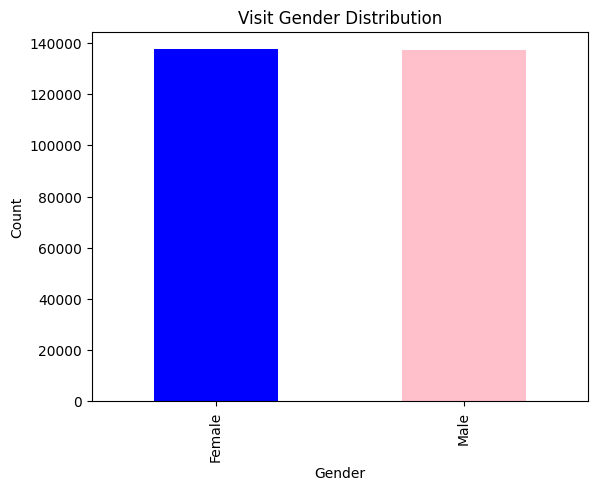

In [19]:
visit_gender.plot(kind='bar', color = ["blue", "pink"])
plt.title("Visit Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

The Bar Graph is fine. However, an pie chart would be a better representation of the data

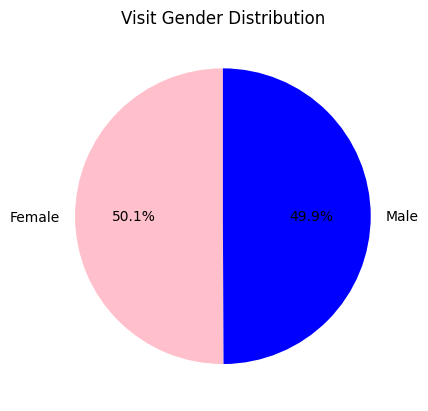

In [25]:
visit_gender.plot(kind='pie', colors=["pink", "blue"], autopct='%1.1f%%', startangle=90)

# Title and labels
plt.title("Visit Gender Distribution")
plt.ylabel('')  # Hide the ylabel for cleaner look

# Show the pie chart
plt.show()

The Gender Ratio is pretty equally split with Male and Female accounting for around the same numbers with Females making up .2% more than Male

### Age Distrbution Graph:

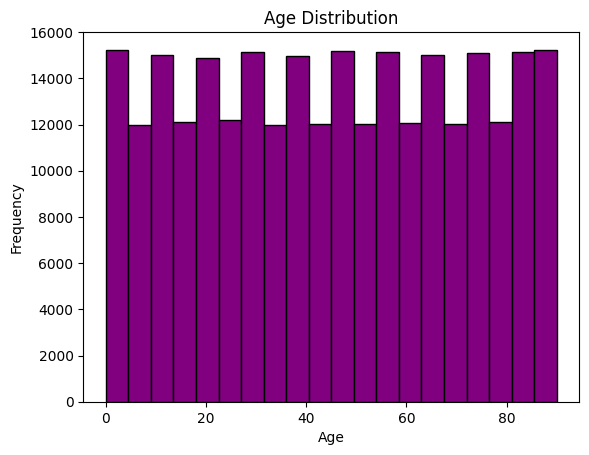

In [26]:
plt.hist(df_visit['Age'],bins=20,color='purple', edgecolor = 'k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# What is the maximum age within our dataframe?
df_visit['Age'].max()


90

In [ ]:
# What is the lowest age within our dataframe
df_visit['Age'].min()

0

In [ ]:
# Let's cateogrize our data into specific ranges to create age intervals
age_bins = [0,10,20,30,40,50,60,70,80,90]

In [ ]:
# Age Range within our Dataframe
df_visit['Age_Range'] = pd.cut(df_visit["Age"],bins=age_bins)

In [ ]:
df_visit.head()

,Visit_Date,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range
0,2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112,"(60, 70]"
1,2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36,"(60, 70]"
2,2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36,"(60, 70]"
3,2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92,"(0, 10]"
4,2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104,"(20, 30]"


In [ ]:
df_visit['Age_Range'].value_counts().sort_index()

,count
Age_Range,
"(0, 10]",110025
"(10, 20]",109930
"(20, 30]",109577
"(30, 40]",109723
"(40, 50]",109960
"(50, 60]",110259
"(60, 70]",110039
"(70, 80]",110051
"(80, 90]",109515


In [ ]:
# Calcuate the frequency of each age group and provide a summary of how many individuals belong to each range
age_distribution = df_visit['Age_Range'].value_counts().sort_index()

### Age Range Distribution

Text(0, 0.5, 'Frenquency')

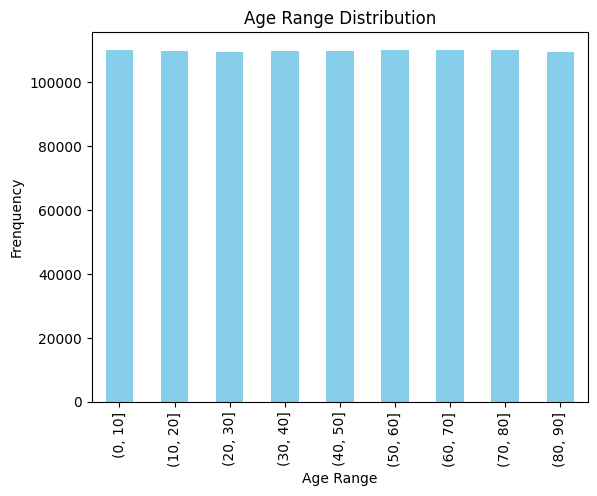

In [ ]:
age_distribution.plot(kind='bar',color='skyblue')
plt.title('Age Range Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frenquency')

In [ ]:
# Summarize and count how many individuals belong to certain postcodes
postcode_counts = df_visit['Postcode'].value_counts()

In [ ]:
postcode_counts

,count
Postcode,
10010,46924
10006,46919
10011,46896
10013,46735
10009,46700
10001,46696
10015,46666
10002,46608
10003,46600


### Top 10 Postcodes by Frequency Bar Chart

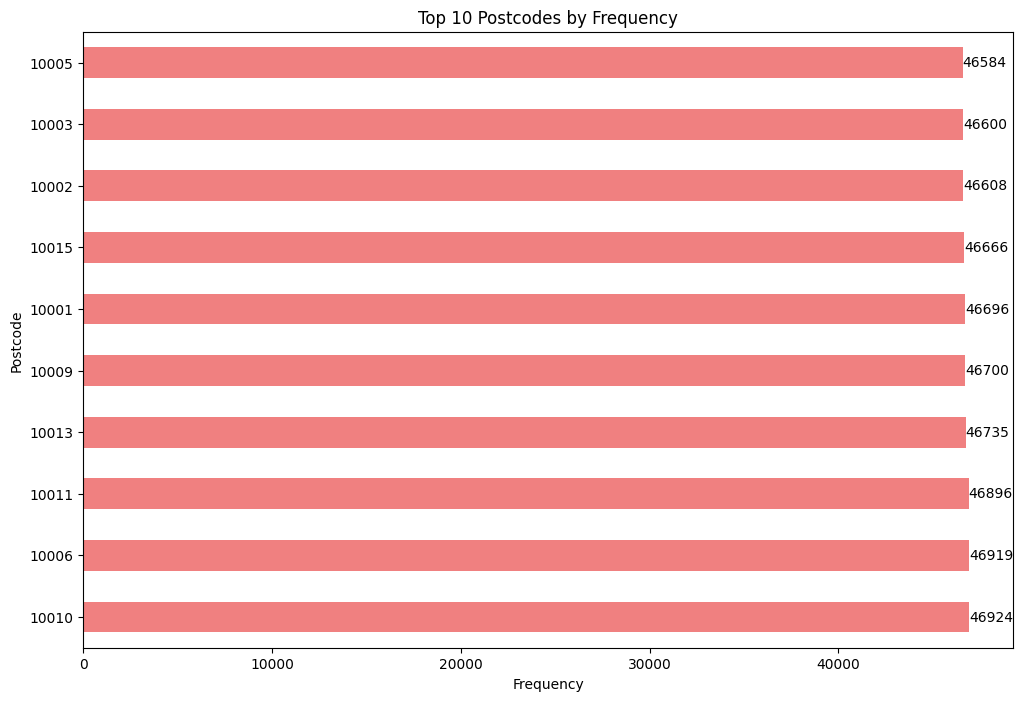

In [ ]:
# Assuming postcode_counts is already defined
postcode_counts = df_visit['Postcode'].value_counts()

# Create a horizontal bar chart
plt.figure(figsize=(12,8))
ax = postcode_counts.head(10).plot(kind='barh', color='lightcoral')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Postcode')
plt.title('Top 10 Postcodes by Frequency')

# Annotate bars with their values
for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + i.get_height() / 2,
            str(round(i.get_width(), 2)), va='center', ha='left', fontsize=10)

# Show the plot
plt.show()



### Age Distribution by Gender

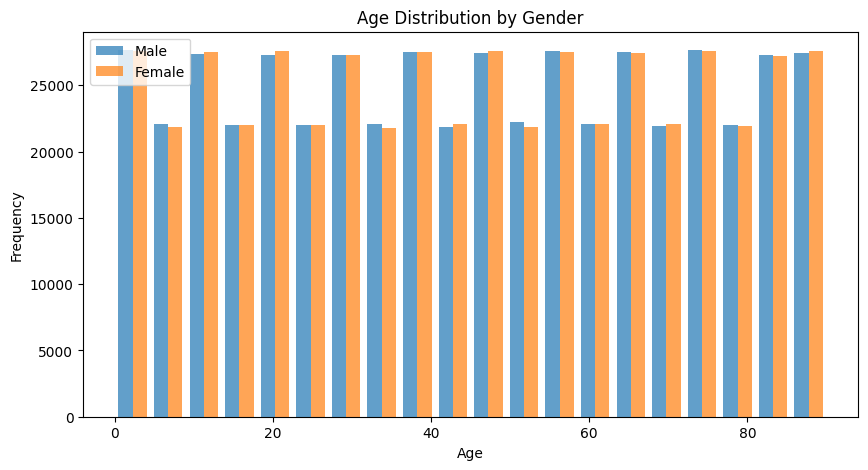

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(
    [df_visit[df_visit['Gender'] == 'Male']['Age'], df_visit[df_visit['Gender'] == 'Female']['Age']],
    bins=20,
    label=['Male', 'Female'],
    alpha=0.7
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender')
plt.legend()
plt.show()

# Trend Analysis of Patient Visits

This analysis focuses on identifying and understanding the patterns and fluctuations in patient visits over a specified period.

In [ ]:
#Set our index to Visit_date in order to group and aggregate our data
df_visit.set_index('Visit_Date', inplace = True)

KeyError: "None of ['Visit_Date'] are in the columns"

In [ ]:
df_visit

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range
Visit_Date,,,,,,,,,,,,,
2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112,"(60, 70]"
2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36,"(60, 70]"
2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36,"(60, 70]"
2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92,"(0, 10]"
2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,385435,9,Male,Abdominal pain,True,10004,1458.0,80,52,11,42,58,"(0, 10]"
2020-05-08,117261,29,Female,Urinary Tract Infection,True,20009,1836.0,59,57,64,66,60,"(20, 30]"
2019-12-31,594613,39,Female,Upper Respiratory Tract Infection,False,10001,1930.0,10,14,69,14,86,"(30, 40]"


In [ ]:
# Resample the df to group data by year and aggregate data to perform an yearly trend of visits
df_resample_year = df_visit.resample('YE').count()

Resampling the data into year, we can can dive into more granular time frames  for insights. Below is the records are counted and calcuates the number of records for each year

In [ ]:
df_resample_year

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range
Visit_Date,,,,,,,,,,,,,
2018-12-31,200016,200016,200016,200016,200016,200016,200016,200016,200016,200016,200016,200016,197865
2019-12-31,200260,200260,200260,200260,200260,200260,200260,200260,200260,200260,200260,200260,198014
2020-12-31,200784,200784,200784,200784,200784,200784,200784,200784,200784,200784,200784,200784,198658
2021-12-31,199663,199663,199663,199663,199663,199663,199663,199663,199663,199663,199663,199663,197453
2022-12-31,199277,199277,199277,199277,199277,199277,199277,199277,199277,199277,199277,199277,197089


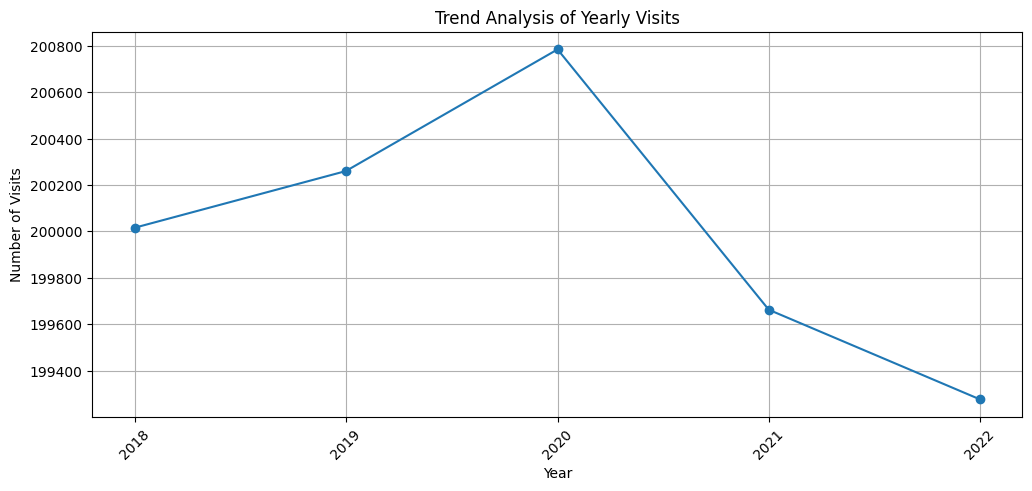

In [ ]:
# Trend Analysis for Yearly Visits based on count of patient_ids
plt.figure(figsize=(12, 5))
plt.plot(df_resample_year.index, df_resample_year['Patient_ID'], marker='o', linestyle='-')
plt.title('Trend Analysis of Yearly Visits')
plt.xlabel('Year')
plt.ylabel('Number of Visits')
plt.grid(True)

# Formatting x-axis to show only years
plt.xticks(df_resample_year.index, df_resample_year.index.year, rotation=45)

plt.show()

Observing that the trend analysis peaked in 2020 before declining significantly in 2021 and 2022. To gain deeper insights into this decline in visits, let's refine the data by aggregating the years into months for a more detailed exploration.

In [ ]:
# Resampling the data based on months instead of years
df_resample_month = df_visit.resample("ME").count()

In [ ]:
df_resample_month

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range
Visit_Date,,,,,,,,,,,,,
2018-01-31,16934,16934,16934,16934,16934,16934,16934,16934,16934,16934,16934,16934,16777
2018-02-28,15252,15252,15252,15252,15252,15252,15252,15252,15252,15252,15252,15252,15080
2018-03-31,17159,17159,17159,17159,17159,17159,17159,17159,17159,17159,17159,17159,16980
2018-04-30,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16367,16192
2018-05-31,16878,16878,16878,16878,16878,16878,16878,16878,16878,16878,16878,16878,16729
2018-06-30,16636,16636,16636,16636,16636,16636,16636,16636,16636,16636,16636,16636,16457
2018-07-31,16992,16992,16992,16992,16992,16992,16992,16992,16992,16992,16992,16992,16796
2018-08-31,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,16898,16702
2018-09-30,16353,16353,16353,16353,16353,16353,16353,16353,16353,16353,16353,16353,16170


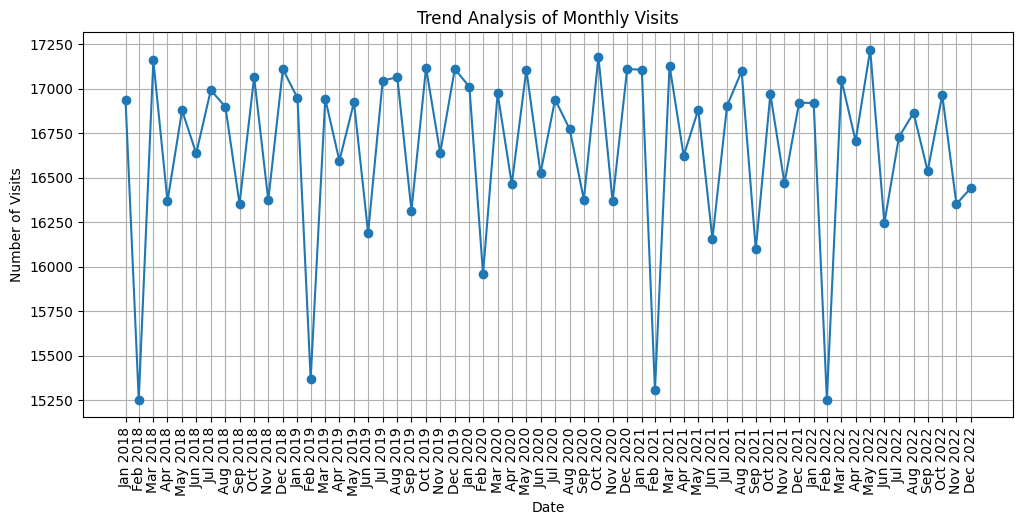

In [ ]:
# Generate monthly tick marks
monthly_tick = pd.date_range(
    start=df_resample_month.index.min(),
    end=df_resample_month.index.max(),
    freq='ME'
)

# labels for x-axis
monthly_labels = [date.strftime('%b %Y') for date in monthly_tick]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df_resample_month.index, df_resample_month['Patient_ID'], marker='o', linestyle='-')
plt.title('Trend Analysis of Monthly Visits')
plt.xticks(monthly_tick, monthly_labels, rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.show()

I observed that February consistently experiences a significant decline in yearly visits. To understand the underlying reasons, let's analyze the trend for February over the past five years.

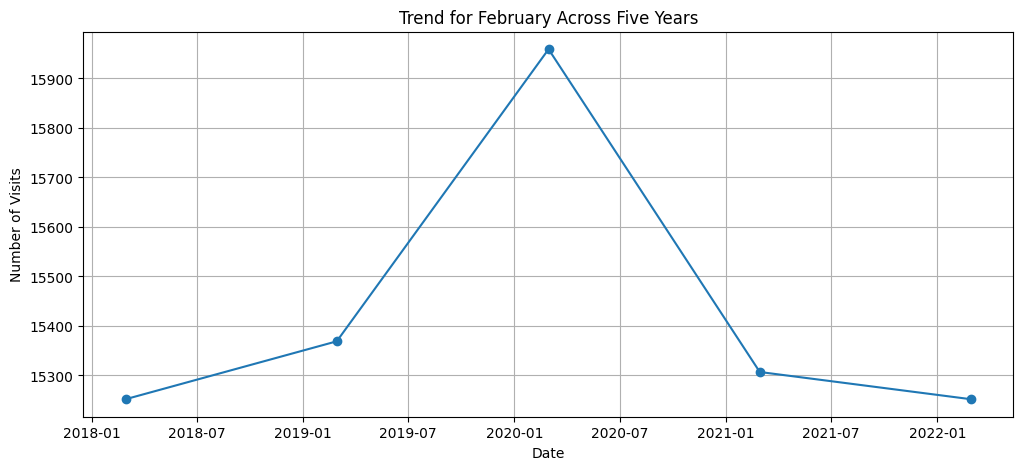

In [ ]:
target_month = 2  # February

# Filter for the target month
df_target_month = df_resample_month[df_resample_month.index.month == target_month]

# Check if there are any data points before proceeding
if not df_target_month.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(df_target_month.index, df_target_month['Postcode'], marker='o', linestyle='-')
    plt.title(f'Trend for {df_target_month.index[0].strftime("%B")} Across Five Years')
    plt.xlabel('Date')
    plt.ylabel('Number of Visits')
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for {pd.to_datetime(target_month, format='%m').strftime('%B')}.")

February consistently experiences low patient visits, averaging around 15,300 visits across the majority of the years. This trend remains stable year after year, with minimal fluctuations. The only exception to this pattern occurred in 2020, where a significant spike was observed, with an increase of approximately 700-900+ visits compared to previous years. This surge in patient visits could be attributed to a variety of factors, including the onset of the COVID-19 pandemic, which led to an increased demand for healthcare services. Let's compare by checking another month such as November

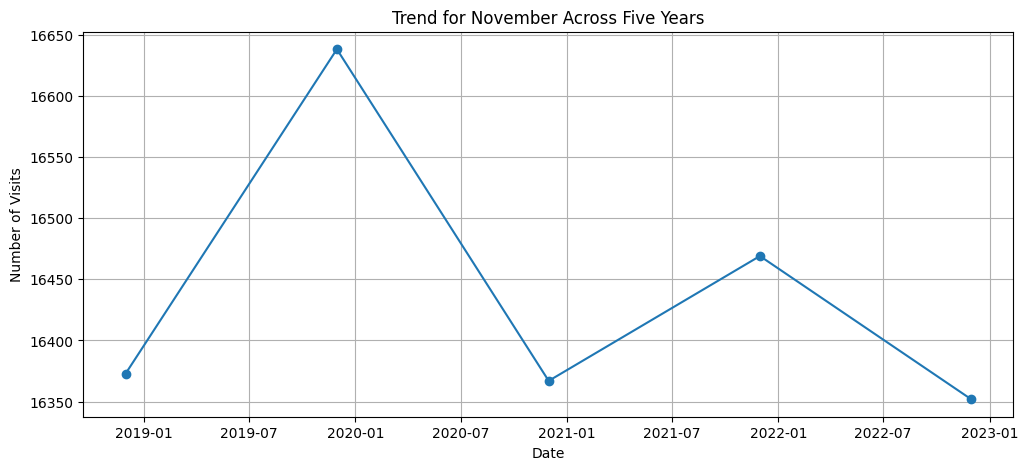

In [ ]:
target_month = 11  # November

# Filter for the target month
df_target_month = df_resample_month[df_resample_month.index.month == target_month]

# Check if there are any data points before proceeding
if not df_target_month.empty:
    plt.figure(figsize=(12, 5))
    plt.plot(df_target_month.index, df_target_month['Postcode'], marker='o', linestyle='-')
    plt.title(f'Trend for {df_target_month.index[0].strftime("%B")} Across Five Years')
    plt.xlabel('Date')
    plt.ylabel('Number of Visits')
    plt.grid(True)
    plt.show()
else:
    print(f"No data available for {pd.to_datetime(target_month, format='%m').strftime('%B')}.")

It appears that when comparing the months of November and February, February generally has a lower number of patient visits. On average, patient visit range around 16,300-16,400 annual visitors when compared with February around 15,300 yearly visitors. However, there is a sudden increase in November 2020, possibly due to the onset of COVID-19. Despite this uptick, the overall trend indicates fewer visits in February compared to November.

Additionally, in both line graphs, we can observe a sharp peak in patient visits at the start of 2020, likely driven by the initial outbreak of COVID-19. This surge suggests a heightened demand for medical attention during that period.

# Operational Efficiency and Financial Analysis

In [ ]:
df_visit.head()

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range
Visit_Date,,,,,,,,,,,,,
2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112,"(60, 70]"
2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36,"(60, 70]"
2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36,"(60, 70]"
2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92,"(0, 10]"
2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104,"(20, 30]"


In [ ]:
# What is the total minutes spent per patient?
df_visit['Total_minutes'] = df_visit['Consultation_minutes'] + df_visit['Nursing_minutes'] + df_visit['Registration_minutes'] + df_visit['Laboratory_minutes'] + df_visit['Pharmacy_minutes']

In [ ]:
df_visit.head()

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range,Total_minutes
Visit_Date,,,,,,,,,,,,,,
2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112,"(60, 70]",379
2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36,"(60, 70]",343
2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36,"(60, 70]",306
2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92,"(0, 10]",325
2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104,"(20, 30]",377


In [ ]:
# Converting the data into hours for easier interpretation and analysis
df_visit['Total_Hours'] = df_visit['Total_minutes'] / 60
df_visit.head()

,Patient_ID,Age,Gender,Diagnosis,Has_Insurance,Postcode,Total_Cost,Registration_minutes,Nursing_minutes,Laboratory_minutes,Consultation_minutes,Pharmacy_minutes,Age_Range,Total_minutes,Total_Hours,Cost_per_minute,Year
Visit_Date,,,,,,,,,,,,,,,,,
2020-05-06,688923,68,Female,Diabetes,True,20006,2274.0,33,105,101,28,112,"(60, 70]",379,6.316667,6.0,2020
2018-08-04,886361,62,Female,Urinary Tract Infection,False,20005,3430.0,46,75,84,102,36,"(60, 70]",343,5.716667,10.0,2018
2021-04-10,464823,70,Female,Upper Respiratory Tract Infection,True,10003,1836.0,107,81,5,77,36,"(60, 70]",306,5.100000,6.0,2021
2021-10-01,655214,8,Female,Upper Respiratory Tract Infection,False,10006,3250.0,66,31,101,35,92,"(0, 10]",325,5.416667,10.0,2021
2018-04-30,454666,24,Male,Malaria,True,10006,2262.0,68,55,60,90,104,"(20, 30]",377,6.283333,6.0,2018


In [ ]:
# Average total time spent when visiting the hosptial?
average_total_time_in_hours = df_visit['Total_Hours'].mean()
average_total_time_in_hours

5.209838183333332

In [ ]:
# Find the Average Cost by Gender
avg_cost_by_gender = df_visit.groupby('Gender')['Total_Cost'].mean()
avg_cost_by_gender

,Total_Cost
Gender,
Female,2627.048550
Male,2625.128996


In [ ]:
# What visit took the longest time?
longest_visit = df_visit['Total_minutes'].max()
longest_visit

582

In [ ]:
# Average consultation time for insured vs uninsured patients
avg_consult_insured = df_visit[df_visit["Has_Insurance"] == True]["Consultation_minutes"].mean()
avg_consult_uninsured = df_visit[df_visit["Has_Insurance"] == False]["Consultation_minutes"].mean()
print(f"\nAvg Consultation Time (Insured): {avg_consult_insured:.2f}")
print(f"Avg Consultation Time (Uninsured): {avg_consult_uninsured:.2f}")


Avg Consultation Time (Insured): 62.44
Avg Consultation Time (Uninsured): 62.52


In [ ]:
# Average total cost for insured vs uninsured patients
avg_cost_insured = df_visit[df_visit["Has_Insurance"] == True]["Total_Cost"].mean()
avg_cost_uninsured = df_visit[df_visit["Has_Insurance"] == False]["Total_Cost"].mean()
print(f"Avg Cost (Insured): {avg_cost_insured:.2f}")
print(f"Avg Cost (Uninsured): {avg_cost_uninsured:.2f}")

Avg Cost (Insured): 1875.42
Avg Cost (Uninsured): 3126.03


In [ ]:
# Average total cost per age range
avg_cost_per_age_range = df_visit.groupby("Age_Range", observed=False)["Total_Cost"].mean()
print("\nAverage Total Cost by Age Range:")
print(avg_cost_per_age_range)


Average Total Cost by Age Range:
Age_Range
(0, 10]     2628.362499
(10, 20]    2625.078814
(20, 30]    2626.975351
(30, 40]    2626.259490
(40, 50]    2626.143070
(50, 60]    2626.630207
(60, 70]    2623.662356
(70, 80]    2625.741120
(80, 90]    2625.774898
Name: Total_Cost, dtype: float64



Average Time Spent per Procedure:
Registration_minutes    62.574824
Nursing_minutes         62.514987
Laboratory_minutes      62.506128
Consultation_minutes    62.488122
Pharmacy_minutes        62.506230
dtype: float64


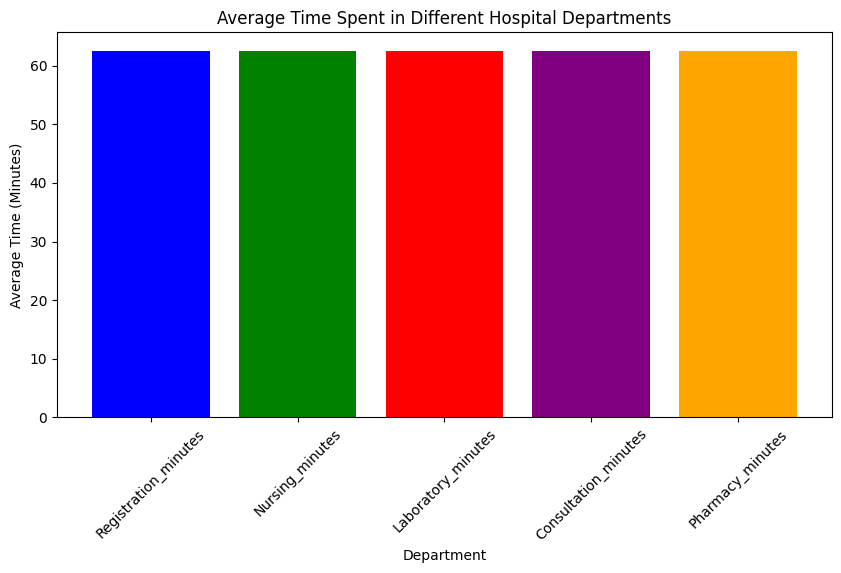

In [ ]:
# What are the most time-consuming procedures on average?
avg_time_per_procedure = df_visit[
    ["Registration_minutes", "Nursing_minutes", "Laboratory_minutes", "Consultation_minutes", "Pharmacy_minutes"]
].mean()

print("\nAverage Time Spent per Procedure:")
print(avg_time_per_procedure)

plt.figure(figsize=(10, 5))
plt.bar(dept_times.index, dept_times.values, color=["blue", "green", "red", "purple", "orange"])
plt.xlabel("Department")
plt.ylabel("Average Time (Minutes)")
plt.title("Average Time Spent in Different Hospital Departments")
plt.xticks(rotation=45)
plt.show()


Top 10 Most Expensive Diagnoses (Average Cost):
Diagnosis
Backpain                             2632.430836
Ear Infection                        2628.842991
Malaria                              2628.715274
Upper Respiratory Tract Infection    2626.288035
Urinary Tract Infection              2625.159897
Hypertension                         2622.463111
Abdominal pain                       2621.657758
Diabetes                             2621.177607
Name: Total_Cost, dtype: float64


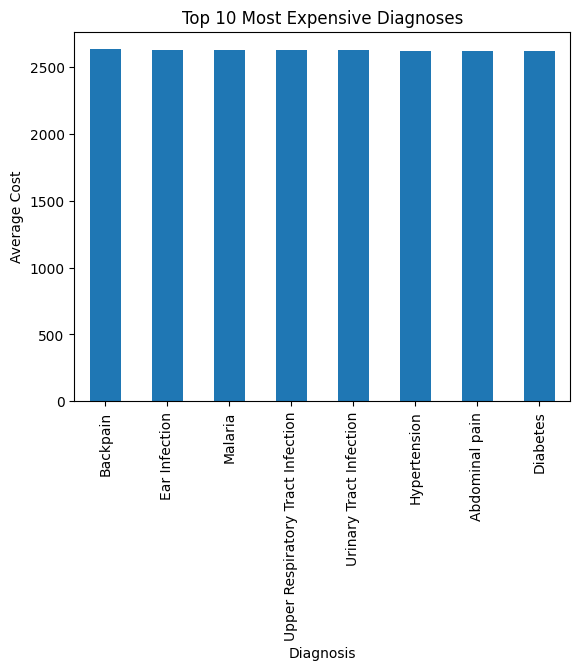

In [ ]:
# Find the Top 10 diagnoses that were the most expensive on average?
top_expensive_diagnoses = df_visit.groupby("Diagnosis", observed=False)["Total_Cost"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Most Expensive Diagnoses (Average Cost):")
print(top_expensive_diagnoses)

top_expensive_diagnoses.plot(kind="bar", title="Top 10 Most Expensive Diagnoses", ylabel="Average Cost")
plt.show()

In [ ]:
# Find the age group that has the highest average total time spent.
avg_time_by_age_group = df_visit.groupby("Age_Range", observed=False)["Total_minutes"].mean().sort_values(ascending=False)
print("\nAverage Total Time Spent by Age Group:")
print(avg_time_by_age_group)


Average Total Time Spent by Age Group:
Age_Range
(40, 50]    312.760076
(20, 30]    312.705449
(0, 10]     312.695569
(70, 80]    312.663747
(30, 40]    312.534810
(80, 90]    312.530731
(10, 20]    312.490212
(50, 60]    312.455092
(60, 70]    312.369260
Name: Total_minutes, dtype: float64


#### Key Statistics (minimum, maximum, average, and median) for the wait times in a specific department

In [ ]:
# What are the key statistics for the wait times in a specific department

from os import wait
# function to calculate wait time statistics for a specific department
def department_wait_time_statistics(df, wait_time_column):
  # Check if the specified column exists in the DataFrame
    if wait_time_column not in df.columns:
        return f"Column '{wait_time_column}' not found in the DataFrame."

  # Convert the wait time column from minutes to hours
    wait_time_minutes = df[wait_time_column]
    wait_time_hours = wait_time_minutes / 60

    min_time = wait_time_hours.min()
    max_time = wait_time_hours.max()
    mean_time = wait_time_hours.mean()
    median_time = wait_time_hours.median()
    std_dev = wait_time_hours.std()

    sentence = (
        f"For the department '{wait_time_column}', wait times range from {min_time:.2f} hours to {max_time:.2f} hours. "
        f"The average wait time is {mean_time:.2f} hours, with a median of {median_time:.2f} hours."
    )

    return sentence


In [ ]:
# Checking by inputting a false Column
department_wait_time_statistics(df_visit, 'Nursing(seconds)')

"Column 'Nursing(seconds)' not found in the DataFrame."

In [ ]:
# Checking by inputting column
department_wait_time_statistics(df_visit, 'Nursing_minutes')

"For the department 'Nursing_minutes', wait times range from 0.08 hours to 2.00 hours. The average wait time is 1.04 hours, with a median of 1.05 hours."

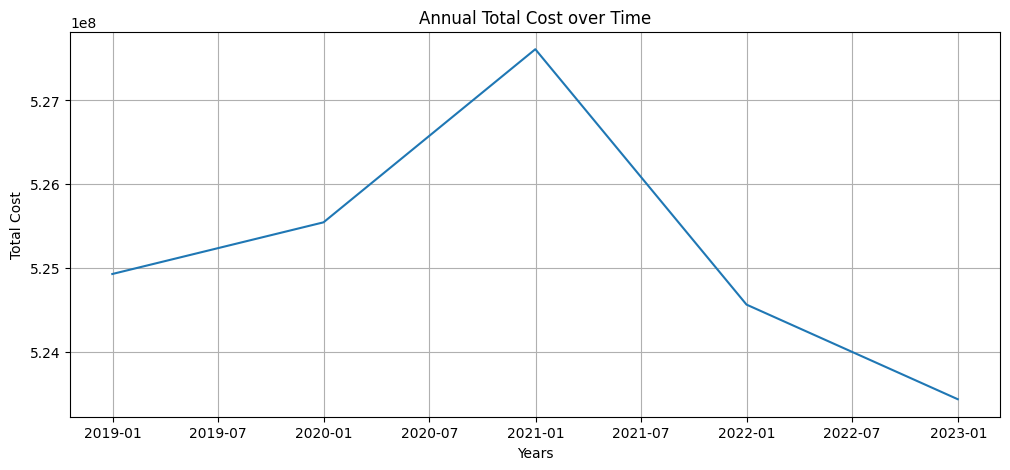

In [ ]:
# What is the annual total cost over time?
annual_total_cost = df_visit['Total_Cost'].resample("YE").sum()
plt.figure(figsize=(12,5))
plt.plot(annual_total_cost.index,annual_total_cost.values)
plt.title("Annual Total Cost over Time")
plt.xlabel("Years")
plt.ylabel("Total Cost")
plt.grid(True)
plt.show()

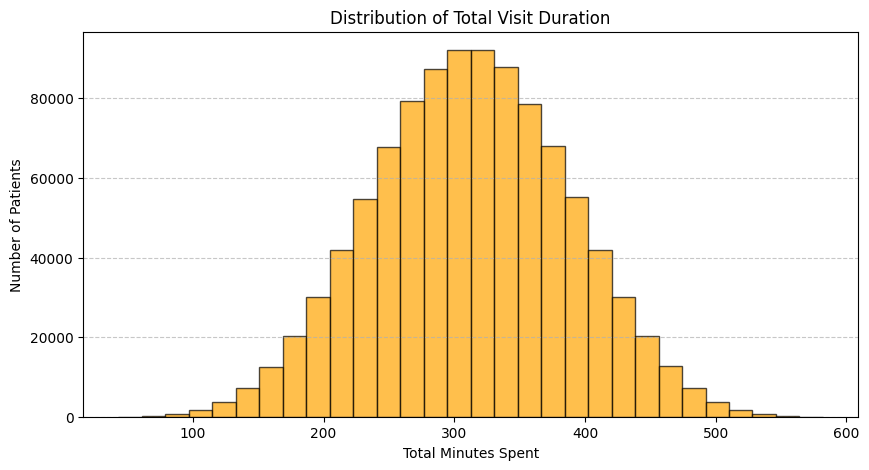

In [ ]:
# What is the distribution of total visit duration across patients?

plt.figure(figsize=(10, 5))
plt.hist(df_visit["Total_minutes"], bins=30, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Total Minutes Spent")
plt.ylabel("Number of Patients")
plt.title("Distribution of Total Visit Duration")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

The average total minutes spent hovers around 300 total minutes spent in total.

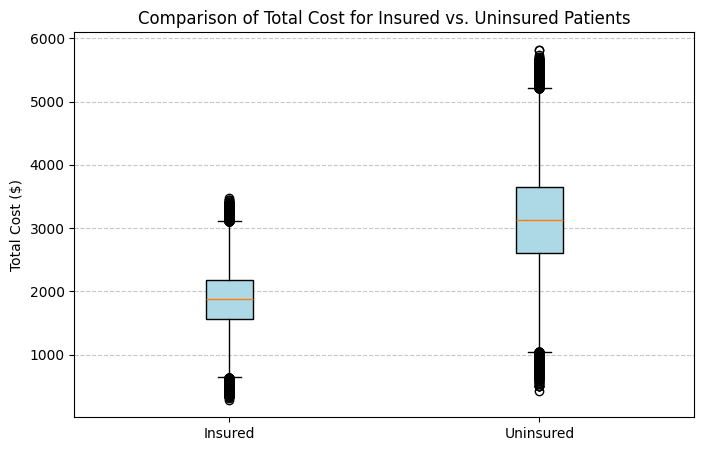

In [ ]:
# How does insurance status affect total cost?

insured = df_visit[df_visit["Has_Insurance"] == True]["Total_Cost"]
uninsured = df_visit[df_visit["Has_Insurance"] == False]["Total_Cost"]

plt.figure(figsize=(8, 5))
plt.boxplot([insured, uninsured], tick_labels=["Insured", "Uninsured"], patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.ylabel("Total Cost ($)")
plt.title("Comparison of Total Cost for Insured vs. Uninsured Patients")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



It seems that the box plot showcase that those without insurance on average experience an higher annual total cost around $1000-$1500 increased cost when compared to those with insurance.

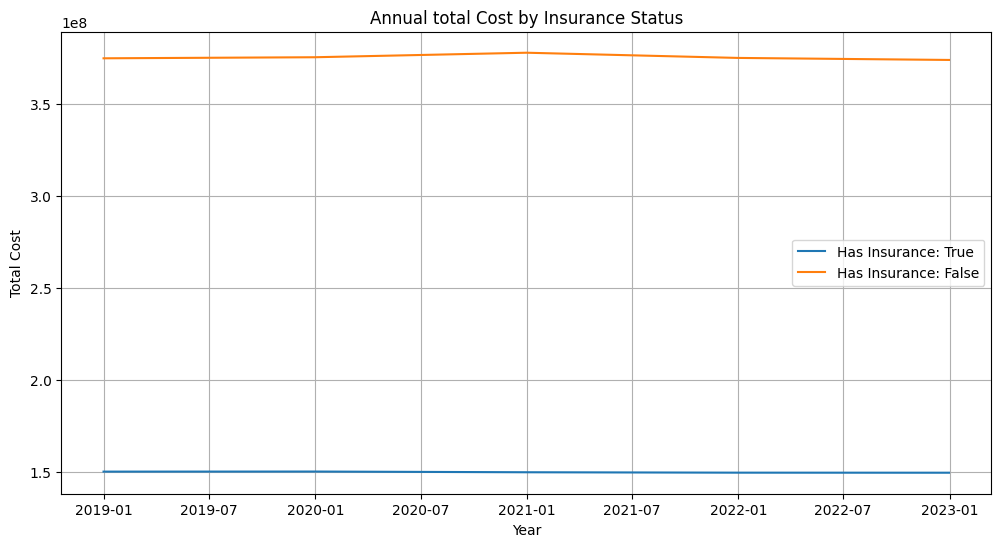

In [ ]:
# What is the Annual total Cost across Years when comparing Insurance Status

insured = df_visit[df_visit["Has_Insurance"] == True]["Total_Cost"].resample('YE').sum()
uninsured = df_visit[df_visit["Has_Insurance"] == False]["Total_Cost"].resample('YE').sum()

plt.figure(figsize=(12,6))
plt.plot(insured.index,insured.values,label='Has Insurance: True')
plt.plot(uninsured.index,uninsured.values,label='Has Insurance: False')
plt.title('Annual total Cost by Insurance Status')
plt.xlabel('Year')
plt.ylabel('Total Cost')
plt.grid(True)
plt.legend()
plt.show()

Annual Total Cost by Insurance is signifiance higher for those without Insurance an 2% increase in total cost when compared with patients that have insurances